# Exploratory Data Analysis on Haberman data

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

1. age- Age at the time of operation
2. year- It represent the year in range 1900
3. nodes- It represents the no of Lymph Nodes (https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes)
4. status- It represent whether patient survive more than 5 years or less after undergone through surgery. If patients                      survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the dataset
data= pd.read_csv('haberman.csv')

In [3]:
#displaying top 5 data
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#no of columns
print( 'The no of columns are {} which are {}'.format(len(data.columns), list(data.columns)))

The no of columns are 4 which are ['age', 'year', 'nodes', 'status']


In [5]:
#shape of data and no of rows in data
print(data.shape)
print('The no of rows of data are {}'.format(data.shape[0]))

(306, 4)
The no of rows of data are 306


In [6]:
#datatype of the columns of data
print(data.dtypes)

print('All the columns are integers values')

age       int64
year      int64
nodes     int64
status    int64
dtype: object
All the columns are integers values


In [28]:
#missing data
data.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

1. No mising data in our dataset so we dont have to bother about imputing missing values
2. The column "status" is a categorical variable 

In [8]:
#transforming column status as "Yes" for 1 and "No" for 2
data.loc[data['status']==1, 'status'] = 'Yes'
data.loc[data['status']==2, 'status'] = 'No'

In [9]:
#Statistics on data
data.describe(include='all')

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


In [29]:
#status column

print(data['status'].value_counts())
print('It represent that no of times paitent survived more than 5 years is 225 and those died below 5 years are 81.')
print('********************************************************************')
print('Total Yes percentage is {}'.format(data['status'].value_counts()[0]/len(data)))
print('Total No percentage is {}'.format(data['status'].value_counts()[1]/len(data)))

Yes    225
No      81
Name: status, dtype: int64
It represent that no of times paitent survived more than 5 years is 225 and those died below 5 years are 81.
********************************************************************
Total Yes percentage is 0.7352941176470589
Total No percentage is 0.2647058823529412


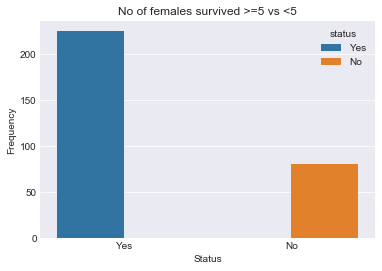

In [38]:
#countplot
sns.set_style(style='darkgrid')
sns.countplot(data['status'], hue=data['status'])
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('No of females survived >=5 vs <5')
plt.show()


**Conclusion**
1. The total no of female who more than survived after operation is around 73.5 %.
2. The dataset is a balanced dataset as count of "No" class is around 25%

# Univariate Analysis

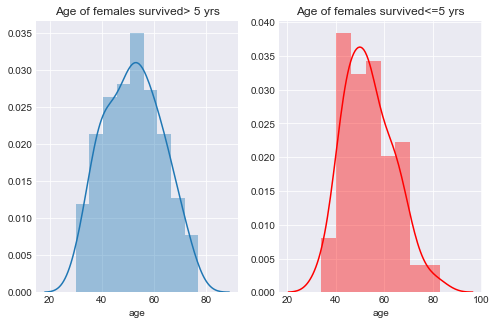

In [43]:
#Age
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.distplot(data.loc[data['status']=='Yes', 'age'])
plt.title('Age of females survived> 5 yrs')
plt.xlabel('age')
plt.subplot(122)
sns.distplot(data.loc[data['status']=='No', 'age'], color='Red')
plt.title('Age of females survived<=5 yrs')
plt.xlabel('age')
plt.show()

**Obsevations:**
1. The age columns seems like a normal distributed.
2. A large range of females between age range 45-50 not survived after operation.
3. A large range of females of age range 50-55 survived after operation

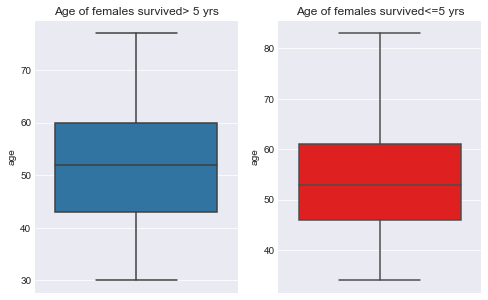

In [45]:
#Outliers in Age
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.boxplot(y=data.loc[data['status']=='Yes', 'age'])
plt.title('Age of females survived> 5 yrs')
plt.subplot(122)
sns.boxplot(y=data.loc[data['status']=='No', 'age'], color='Red')
plt.title('Age of females survived<=5 yrs')
plt.show()

**Conclusion**
1. There is no outlier in Age column.
2. The 25th percentile, median age and 75th percentile for both cases looks same

In [13]:
#Analysis of both classes using 'Age" column.
print('Age of females survived> 5 yrs')
print(pd.DataFrame(data.loc[data['status']=='Yes', 'age'].describe()))
print('\n')
print('Age of females survived<=5 yrs')
print(pd.DataFrame(data.loc[data['status']=='No', 'age'].describe()))

Age of females survived> 5 yrs
              age
count  225.000000
mean    52.017778
std     11.012154
min     30.000000
25%     43.000000
50%     52.000000
75%     60.000000
max     77.000000


Age of females survived<=5 yrs
             age
count  81.000000
mean   53.679012
std    10.167137
min    34.000000
25%    46.000000
50%    53.000000
75%    61.000000
max    83.000000


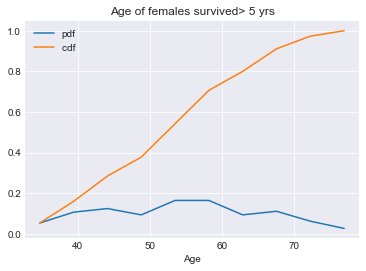

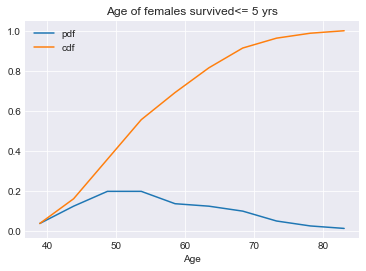

In [77]:
#CDF
countsY, bin_edgesY = np.histogram(data.loc[data['status']=='Yes', 'age'], bins=10,density = False)
countsN, bin_edgesN = np.histogram(data.loc[data['status']=='No', 'age'], bins=10,density = False)
#print(countsY)
#print(bin_edgesY)
countsY= countsY/sum(countsY)
countsN= countsN/sum(countsN)

cumsumY= np.cumsum(countsY)
cumsumN= np.cumsum(countsN)

plt.figure(num=1)
plt.plot(bin_edgesY[1:], countsY, label='pdf')
plt.plot(bin_edgesY[1:], cumsumY, label= 'cdf ')
plt.xlabel('Age')
plt.title('Age of females survived> 5 yrs')
plt.legend()
plt.show()

plt.figure(num=2)
plt.plot(bin_edgesN[1:], countsN, label='pdf')
plt.plot(bin_edgesN[1:], cumsumN, label='cdf')
plt.xlabel('Age')
plt.legend()
plt.title('Age of females survived<= 5 yrs')
plt.show()

**Conclusion:**
1. All the statistical parameter looks almost same for both the classes.
2. Age is not a very good parameter to classify the indivisual classes(Yes/No)

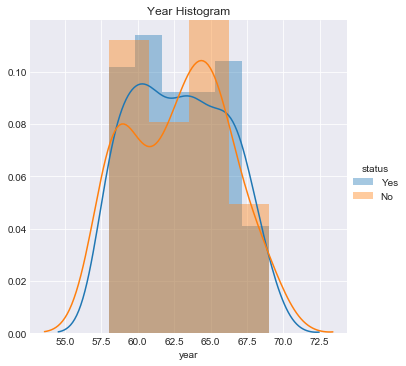

In [57]:
#Year
x= sns.FacetGrid(data, hue='status', size=5, )
x= x.map(sns.distplot, 'year')
x =x.add_legend()
plt.title('Year Histogram')
plt.show()

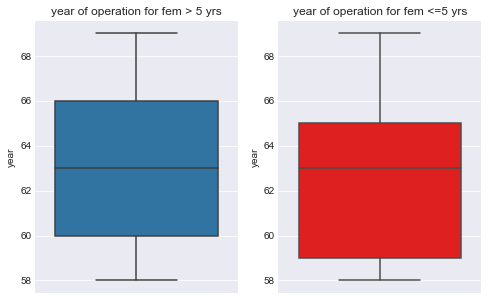

There are no outliers in year column


In [59]:
#Outliers in Year
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.boxplot(y=data.loc[data['status']=='Yes', 'year'])
plt.title('year of operation for fem > 5 yrs')
plt.subplot(122)
sns.boxplot(y=data.loc[data['status']=='No', 'year'], color='Red')
plt.title('year of operation for fem <=5 yrs')
plt.show()

print('There are no outliers in year column')

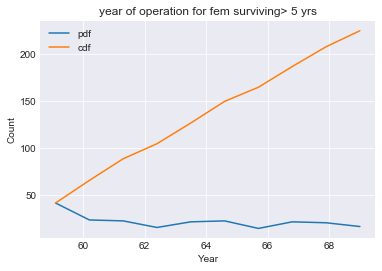

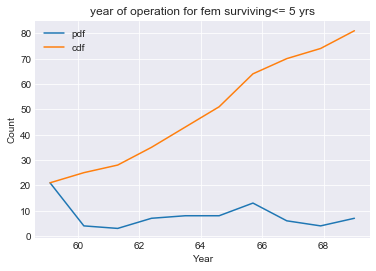

In [79]:
#CDF
countsY, bin_edgesY = np.histogram(data.loc[data['status']=='Yes', 'year'], bins=10,density = False)
countsN, bin_edgesN = np.histogram(data.loc[data['status']=='No', 'year'], bins=10,density = False)
#print(countsY)
#print(bin_edgesY)
#countsY= countsY/sum(countsY)
#countsN= countsN/sum(countsN)

cumsumY= np.cumsum(countsY)
cumsumN= np.cumsum(countsN)

plt.figure(num=1)
plt.plot(bin_edgesY[1:], countsY, label = 'pdf')
plt.plot(bin_edgesY[1:], cumsumY, label='cdf')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('year of operation for fem surviving> 5 yrs')
plt.show()

plt.figure(num=2)
plt.plot(bin_edgesN[1:], countsN, label = 'pdf')
plt.plot(bin_edgesN[1:], cumsumN, label = 'cdf')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('year of operation for fem surviving<= 5 yrs')
plt.show()


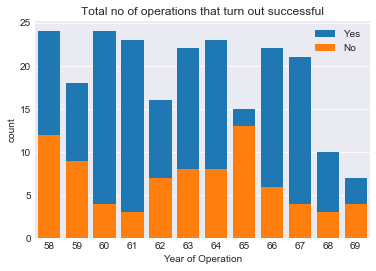

In [66]:
#No of cases each year:
plt.figure(figsize=(6,4))
sns.countplot(x=data['year'], hue=data['status'], saturation=1, dodge=False)
plt.legend()
plt.title('Total no of operations that turn out successful')
plt.xlabel('Year of Operation')
plt.show()

**Conclusion-**
1. With the increase in year the number of successful operations (Yes cases) remains contant.
2. The number of unsuccessful operations (No cases) declined after 1965
3. Year 1965 can be considered as a bad year where no of successful operations = no. of unsuccessful operation.
4. The females treated after 1966 have a higher chace of surviving. The females treated before 1959 have lower chance of surving.
5. using CDF plot we can see that there are lot of fluctuations in "No" cases

In [19]:
#Nodes

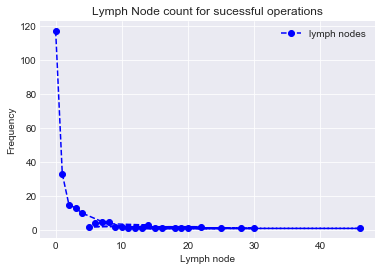

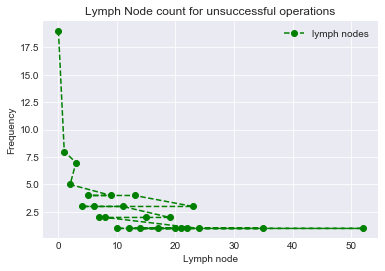

In [82]:
#Checking the Lymph node count for each clasees
node_Y = data.loc[data['status']=='Yes', 'nodes'].value_counts().sort_values(ascending=False)
plt.figure(num=3)
plt.plot(node_Y.index, node_Y.values, linestyle='dashed', color='blue', marker='o', label='lymph nodes')
plt.xlabel('Lymph node')
plt.ylabel('Frequency')
plt.legend()
plt.title('Lymph Node count for sucessful operations' )
plt.show()

node_N = data.loc[data['status']=='No', 'nodes'].value_counts().sort_values(ascending=False)
plt.figure(num=4)
plt.plot(node_N.index, node_N.values, linestyle='dashed', color='green', marker='o', label='lymph nodes')
plt.xlabel('Lymph node')
plt.ylabel('Frequency')
plt.legend()
plt.title('Lymph Node count for unsuccessful operations' )
plt.show()

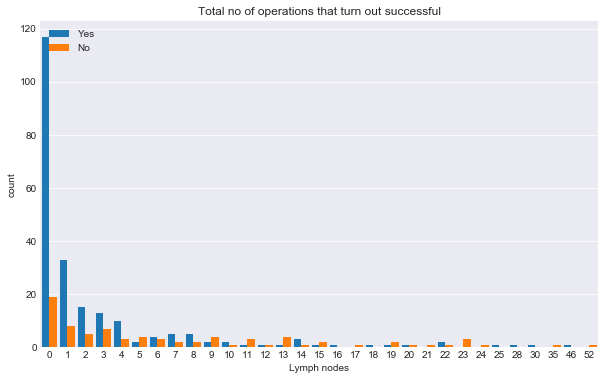

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['nodes'], hue=data['status'], saturation=1, dodge=True)
plt.legend()
plt.title('Total no of operations that turn out successful')
plt.xlabel('Lymph nodes')
plt.show()

**Conclusion**
1. For lower count of lymph nodes number of successful operations are much greater than unsuccessful.
2. There are very few cases where count of lymph node is high and operation is successful. Operations are mostly unsuccessful when Lymph node count is greater than 10

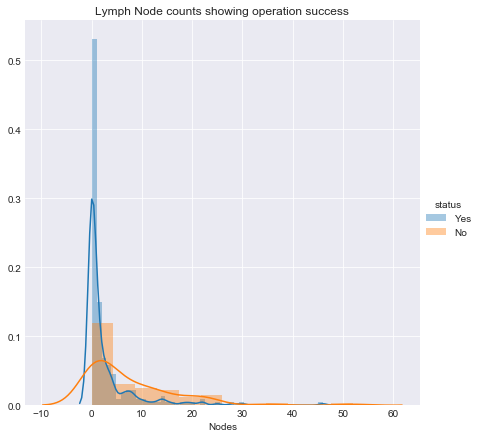

In [75]:
x= sns.FacetGrid(data, hue='status', size=6)
x= x.map(sns.distplot, 'nodes')
x.add_legend()
plt.xlabel('Nodes')
plt.title('Lymph Node counts showing operation success')
plt.show()

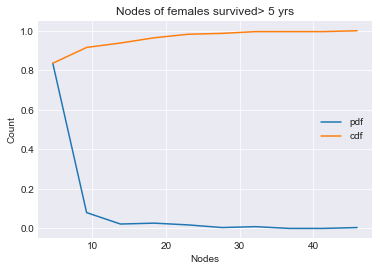

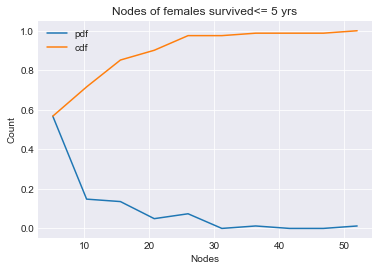

In [85]:
#CDF
countsY, bin_edgesY = np.histogram(data.loc[data['status']=='Yes', 'nodes'], bins=10,density = False)
countsN, bin_edgesN = np.histogram(data.loc[data['status']=='No', 'nodes'], bins=10,density = False)
#print(countsY)
#print(bin_edgesY)
countsY= countsY/sum(countsY)
countsN= countsN/sum(countsN)

cumsumY= np.cumsum(countsY)
cumsumN= np.cumsum(countsN)

plt.figure(num=1)
plt.plot(bin_edgesY[1:], countsY, label='pdf')
plt.plot(bin_edgesY[1:], cumsumY, label='cdf')
plt.title('Nodes of females survived> 5 yrs')
plt.xlabel('Nodes')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.figure(num=2)
plt.plot(bin_edgesN[1:], countsN, label='pdf')
plt.plot(bin_edgesN[1:], cumsumN, label='cdf')
plt.xlabel('Nodes')
plt.ylabel('Count')
plt.legend()
plt.title('Nodes of females survived<= 5 yrs')
plt.show()

In [24]:
#Analysis of both classes using 'nodes" column.
print('Nodes of females survived> 5 yrs')
print(pd.DataFrame(data.loc[data['status']=='Yes', 'nodes'].describe()))
print('\n')
print('Nodes of females survived<=5 yrs')
print(pd.DataFrame(data.loc[data['status']=='No', 'nodes'].describe()))

Nodes of females survived> 5 yrs
            nodes
count  225.000000
mean     2.791111
std      5.870318
min      0.000000
25%      0.000000
50%      0.000000
75%      3.000000
max     46.000000


Nodes of females survived<=5 yrs
           nodes
count  81.000000
mean    7.456790
std     9.185654
min     0.000000
25%     1.000000
50%     4.000000
75%    11.000000
max    52.000000


**Conclusion**
1. The mean and std dev of Positive lymph nodes is much smaller than negative one indicating that operation got successful for smaller no of lymph nodes.
2. The number of positive lymph nodes in females is highly densed from 0 to 5. 
3. Almost 80% of the females have less than or equal to 5 positive lymph nodes.

# Bivariate Analysis

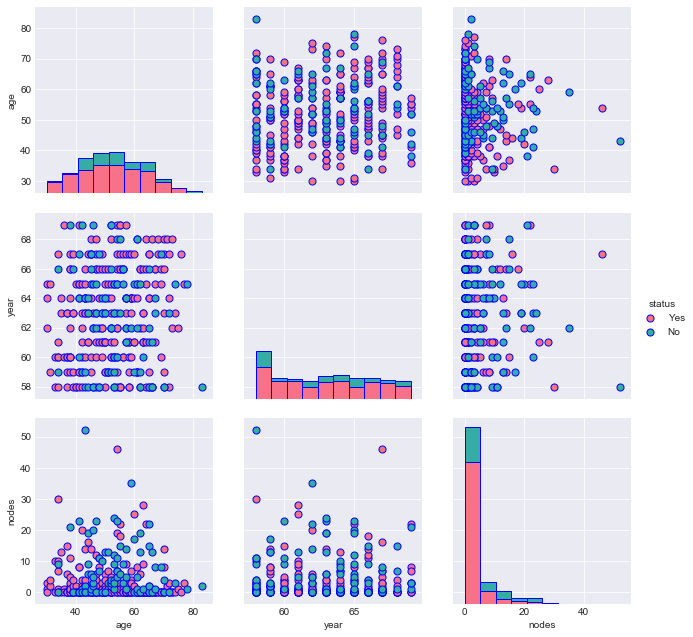

In [88]:
#Pairplot
sns.pairplot(data, hue='status', size=3, aspect = 1, palette="husl", plot_kws=dict(s=50, edgecolor="b", linewidth=1),
            diag_kws= dict( edgecolor="b", linewidth=1))
plt.show()

            age      year     nodes
age    1.000000  0.176798 -0.085851
year   0.176798  1.000000  0.037406
nodes -0.085851  0.037406  1.000000




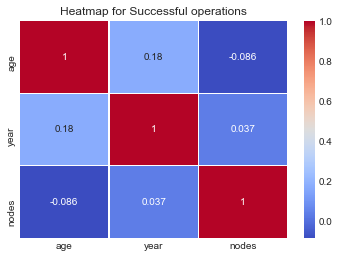

In [93]:
#Correlation 
#Successful operations
print(data.loc[data['status']=='Yes'].corr())
print('\n')

plt.figure(figsize=(6,4))
sns.heatmap(data.loc[data['status']=='Yes'].corr(), cmap='coolwarm', annot=True, linecolor='white', linewidths=0.25)
plt.title("Heatmap for Successful operations")
plt.show()

            age      year     nodes
age    1.000000 -0.163146 -0.095716
year  -0.163146  1.000000 -0.071501
nodes -0.095716 -0.071501  1.000000




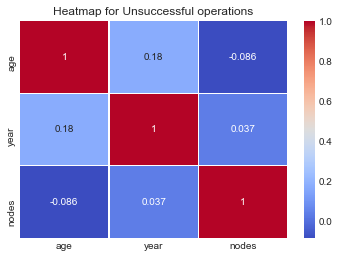

In [92]:
#Unsuccessful operations
print(data.loc[data['status']=='No'].corr())
print('\n')

plt.figure(figsize=(6,4))
sns.heatmap(data.loc[data['status']=='Yes'].corr(), cmap='coolwarm', annot=True, linecolor='white', linewidths=0.25)
plt.title("Heatmap for Unsuccessful operations")
plt.show()

**Conclusion**
1. There is very less correlation between either of the variables.
2. Comparing all the plots, there is a fair relationship between Year and age for both the classes.